# 🌾 Regional Crop Yield Analysis
This notebook provides data preprocessing and visualization for understanding crop yield trends across different states and regions in India.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load the dataset
df = pd.read_csv("Updated_Dataset.csv")
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Region,Latitude,Longitude
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,Northeast,26.2006,92.9376
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,Northeast,26.2006,92.9376
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,Northeast,26.2006,92.9376
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,Northeast,26.2006,92.9376
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,Northeast,26.2006,92.9376


In [3]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
 10  Region           19689 non-null  object 
 11  Latitude         19689 non-null  float64
 12  Longitude        19689 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 2.0+ MB


In [4]:
# Describe the dataset
df.describe(include='all')


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Region,Latitude,Longitude
count,19689,19689.000000,19689,19689,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000,19689,19689.000000,19689.000000
unique,55,NaN,6,30,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Rice,NaN,Kharif,Karnataka,NaN,NaN,NaN,NaN,NaN,NaN,South,NaN,NaN
freq,1197,NaN,8232,1432,NaN,NaN,NaN,NaN,NaN,NaN,5121,NaN,NaN
mean,NaN,2009.127584,NaN,NaN,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009,NaN,22.327144,81.948634
std,NaN,6.498099,NaN,NaN,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193,NaN,6.011997,6.595446
min,NaN,1997.000000,NaN,NaN,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000,NaN,10.850500,71.192400
25%,NaN,2004.000000,NaN,NaN,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000,NaN,15.912900,76.576200
50%,NaN,2010.000000,NaN,NaN,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000,NaN,22.986800,79.740000
75%,NaN,2015.000000,NaN,NaN,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889,NaN,26.200600,87.855000


In [5]:
# Check for missing values
df.isnull().sum()


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
Region             0
Latitude           0
Longitude          0
dtype: int64

## 📊 Frequency of samples 

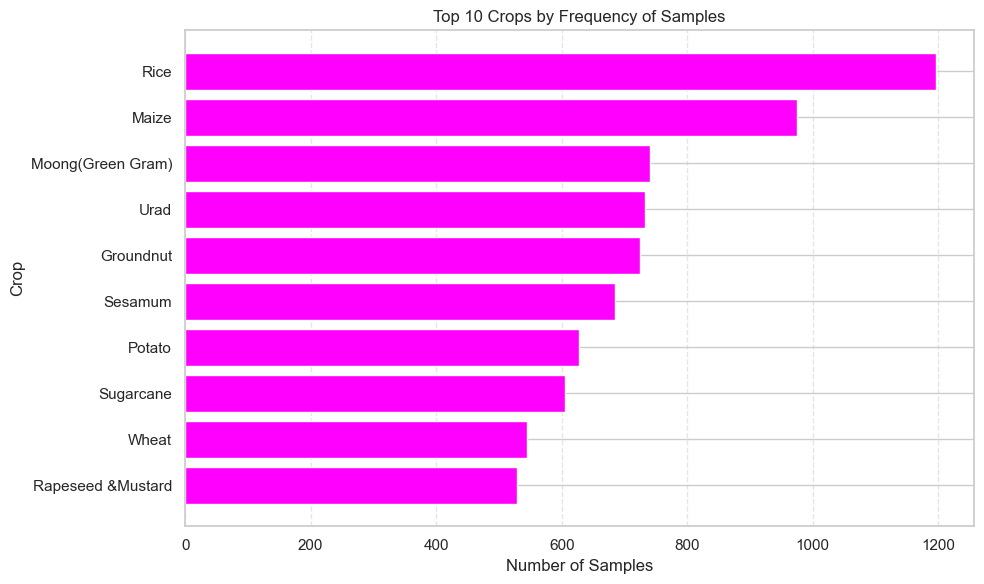

In [6]:
# Get top 10 crops by number of samples
top_crops = df['Crop'].value_counts().head(10)

# Plotting horizontal bar chart with green color
plt.figure(figsize=(10, 6))
plt.barh(top_crops.index, top_crops.values, color='magenta')
plt.title("Top 10 Crops by Frequency of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Crop")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📍 State-wise Total Production

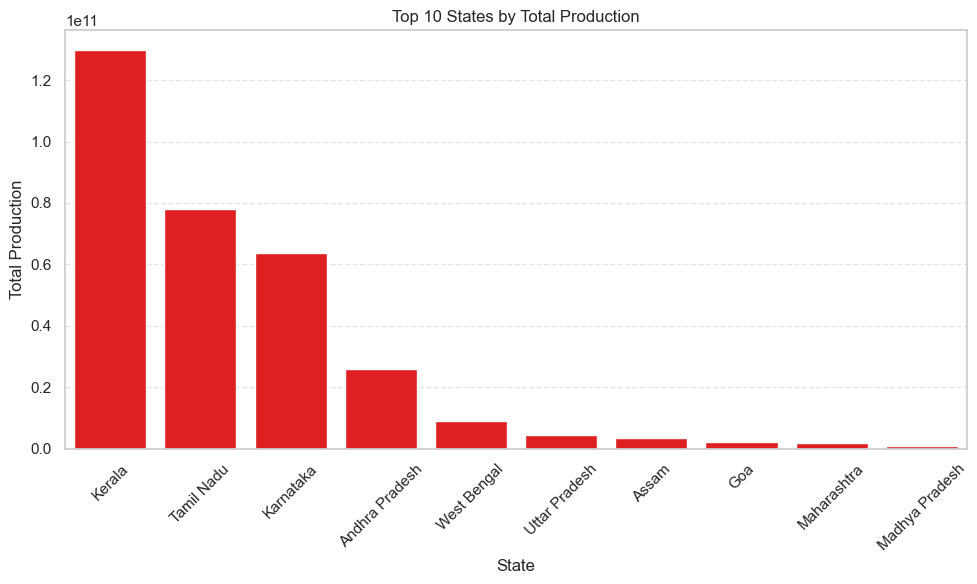

In [7]:
# Group by State and get total production
state_production = df.groupby("State")["Production"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_production.index, y=state_production.values, color='red')
plt.title("Top 10 States by Total Production")
plt.xlabel("State")
plt.ylabel("Total Production")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 🌧️ Regional Contribution to Average Crop Yield

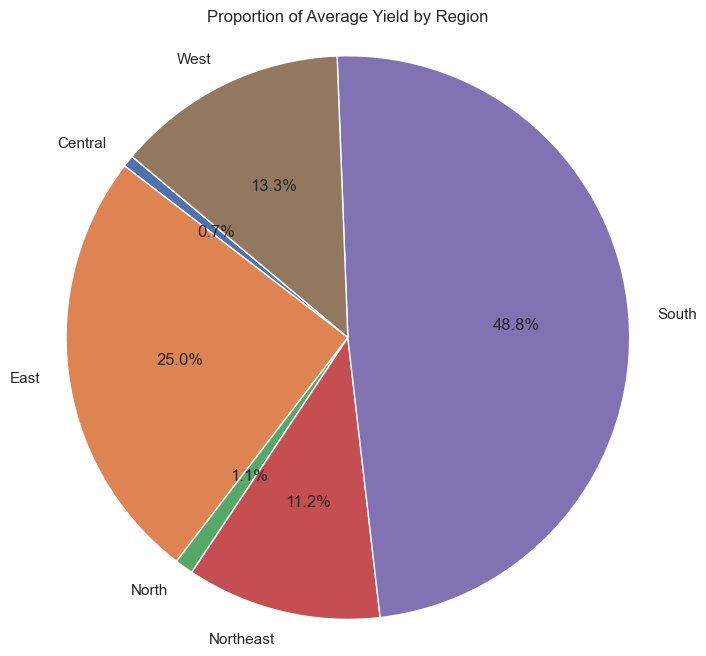

In [8]:
avg_yield_region = df.groupby('Region')['Yield'].mean()

plt.figure(figsize=(8,8))
plt.pie(
    avg_yield_region,
    labels=avg_yield_region.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Proportion of Average Yield by Region")
plt.axis('equal')
plt.show()


## 💊 Frequency of samples per crop

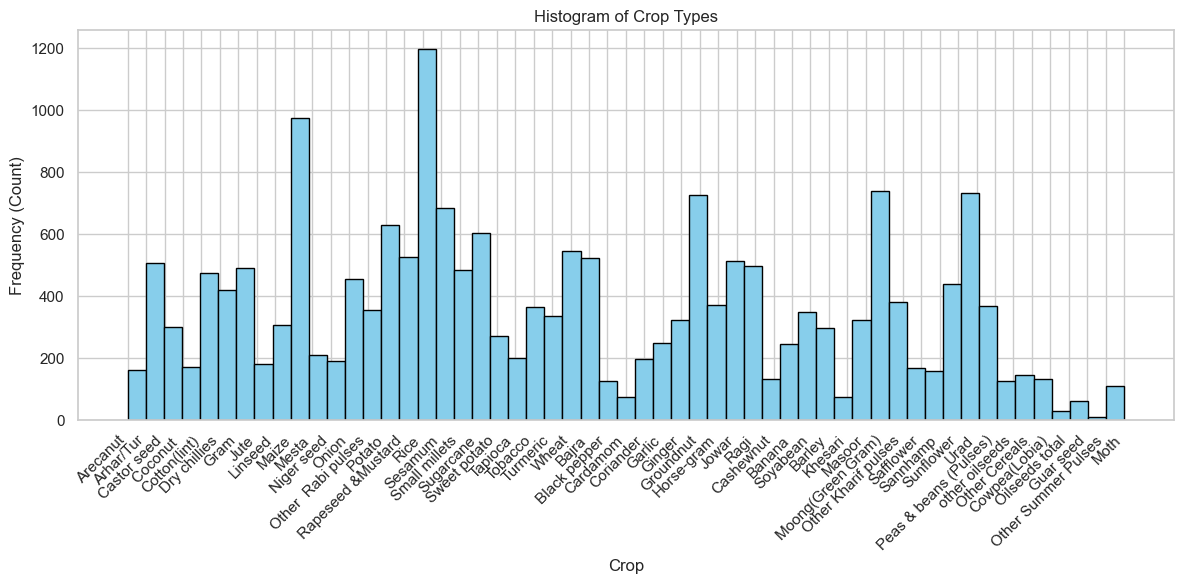

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist(df['Crop'], bins=len(df['Crop'].unique()), color='skyblue', edgecolor='black')
plt.title("Histogram of Crop Types")
plt.xlabel("Crop")
plt.ylabel("Frequency (Count)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 🔥 Correlation Heatmap

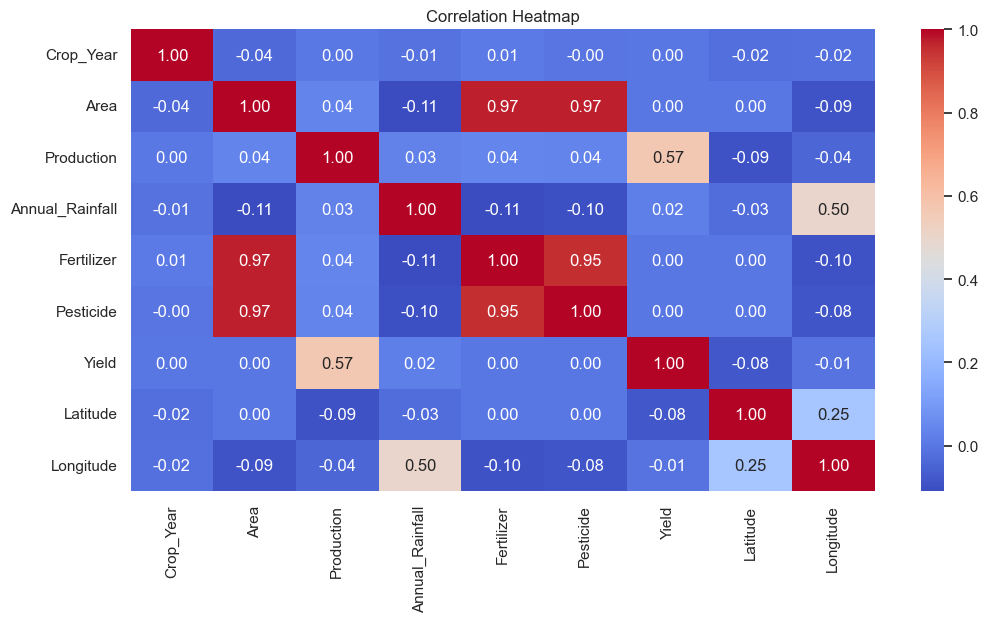

In [10]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
